In [1]:
from dataset import get_loader
from utils import plot_batch

In [2]:
from pathlib import Path

In [3]:
from config import Config

In [4]:
celeb_path = Path('./data/CelebA')
train_path = celeb_path / 'train'
test_path = celeb_path / 'test'
val_path = celeb_path / 'validation'

In [5]:
model_id = 'vit_b32'

In [6]:
config = Config(
    model_id=model_id,
    img_size=224,
    train_path=train_path,
    test_path=test_path,
    val_path=val_path,
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

In [7]:
batch_size = 2
image_limit = 2

learning_rate = 1e-8
num_epochs = 10

debug = True
debug_step = 5

In [8]:
train_loader = get_loader(
    data_path=train_path,
    config=config,
    batch_size=batch_size,
    image_limit=image_limit,
    augment=True
)

In [9]:
val_loader = get_loader(
    data_path=val_path,
    config=config,
    batch_size=batch_size,
    image_limit=image_limit,
    augment=True
)

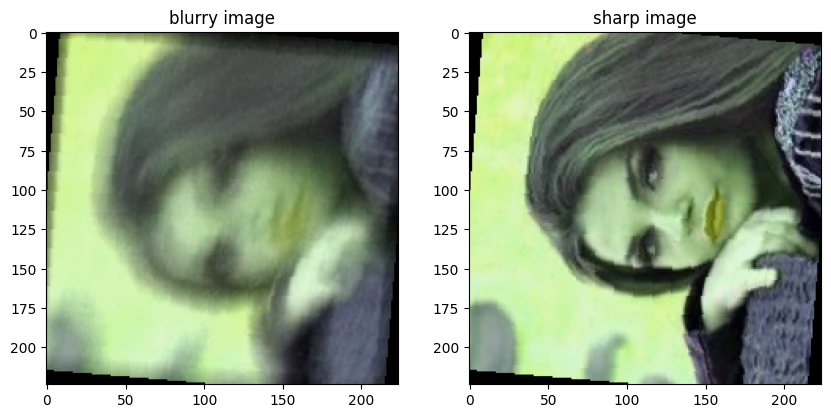

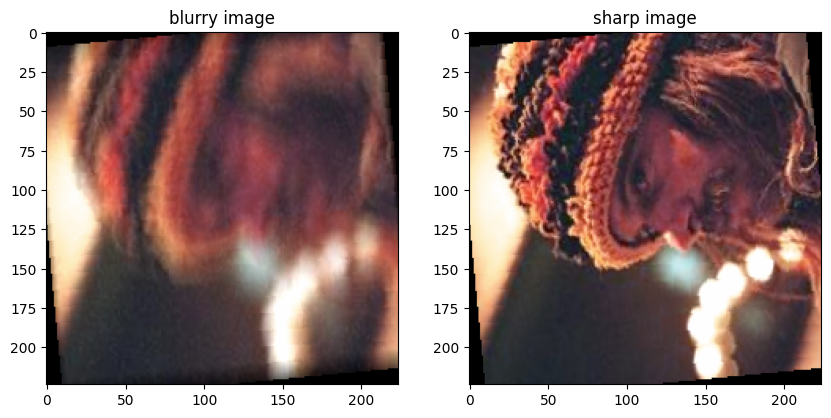

In [10]:
plot_batch(train_loader, config=config, batch_index=0)

In [11]:
from cnn import get_cnn
from vit import get_vit

In [12]:
model = get_vit(config=config)

In [13]:
from loss import losses

In [14]:
print(f'Supported losses: {list(losses.keys())}')

Supported losses: ['MSE', 'L1', 'PSNR']


In [15]:
criterion = losses['PSNR']

In [16]:
from trainer import Trainer

In [17]:
import torch

In [18]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
trainer = Trainer(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    config=config,
    debug=debug,
    debug_step=debug_step
)

In [20]:
Trainer.supported_models()

['resnet50',
 'resnet101',
 'resnet152',
 'inception_v3',
 'vit_b32',
 'vit_l32',
 'vit_h14']

Starting Epoch 1 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]

tensor(1.7459, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(-2.4203, device='cuda:0', grad_fn=<MulBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0041445196..0.8904775].


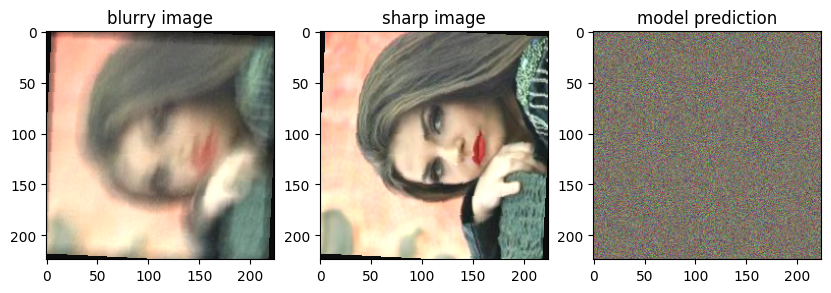

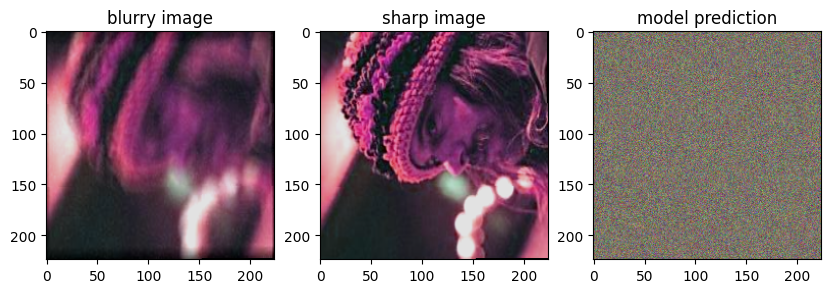

100%|██████████| 1/1 [00:00<00:00, 30.88batch/s]


tensor(1.7805, device='cuda:0')
tensor(-2.5055, device='cuda:0')
Epoch: 1, Train loss: -4.8406, Validation loss: -5.0110
Starting Epoch 2 of 10.


100%|██████████| 1/1 [00:00<00:00, 21.28batch/s]


tensor(1.5784, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(-1.9822, device='cuda:0', grad_fn=<MulBackward0>)


100%|██████████| 1/1 [00:00<00:00, 33.39batch/s]


tensor(1.7855, device='cuda:0')
tensor(-2.5177, device='cuda:0')
Epoch: 2, Train loss: -3.9643, Validation loss: -5.0353
Starting Epoch 3 of 10.


100%|██████████| 1/1 [00:00<00:00, 20.74batch/s]


tensor(1.9152, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(-2.8221, device='cuda:0', grad_fn=<MulBackward0>)


100%|██████████| 1/1 [00:00<00:00, 32.52batch/s]


tensor(2.2169, device='cuda:0')
tensor(-3.4575, device='cuda:0')
Epoch: 3, Train loss: -5.6441, Validation loss: -6.9149
Starting Epoch 4 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]

tensor(1.6144, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(-2.0800, device='cuda:0', grad_fn=<MulBackward0>)


100%|██████████| 1/1 [00:00<00:00, 32.05batch/s]


tensor(1.6658, device='cuda:0')
tensor(-2.2162, device='cuda:0')
Epoch: 4, Train loss: -4.1600, Validation loss: -4.4324
Starting Epoch 5 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]

tensor(1.5661, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(-1.9481, device='cuda:0', grad_fn=<MulBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.017296076..0.89149684].


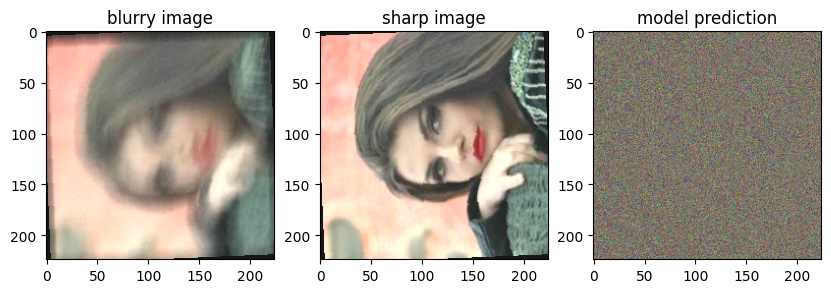

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00063943863..0.9026449].


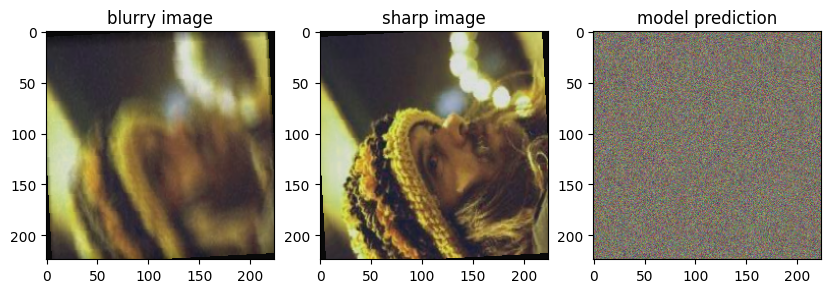

100%|██████████| 1/1 [00:00<00:00, 32.46batch/s]


tensor(1.8977, device='cuda:0')
tensor(-2.7822, device='cuda:0')
Epoch: 5, Train loss: -3.8962, Validation loss: -5.5645
Starting Epoch 6 of 10.


100%|██████████| 1/1 [00:00<00:00, 20.76batch/s]


tensor(1.3493, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(-1.3012, device='cuda:0', grad_fn=<MulBackward0>)


100%|██████████| 1/1 [00:00<00:00, 31.90batch/s]


tensor(1.6815, device='cuda:0')
tensor(-2.2570, device='cuda:0')
Epoch: 6, Train loss: -2.6025, Validation loss: -4.5140
Starting Epoch 7 of 10.


100%|██████████| 1/1 [00:00<00:00, 21.13batch/s]


tensor(2.0313, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(-3.0778, device='cuda:0', grad_fn=<MulBackward0>)


100%|██████████| 1/1 [00:00<00:00, 33.24batch/s]


tensor(1.7006, device='cuda:0')
tensor(-2.3060, device='cuda:0')
Epoch: 7, Train loss: -6.1556, Validation loss: -4.6120
Starting Epoch 8 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]

tensor(1.8458, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(-2.6619, device='cuda:0', grad_fn=<MulBackward0>)


100%|██████████| 1/1 [00:00<00:00, 31.69batch/s]


tensor(1.6325, device='cuda:0')
tensor(-2.1285, device='cuda:0')
Epoch: 8, Train loss: -5.3238, Validation loss: -4.2570
Starting Epoch 9 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]

tensor(1.1142, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(-0.4695, device='cuda:0', grad_fn=<MulBackward0>)


100%|██████████| 1/1 [00:00<00:00, 31.69batch/s]


tensor(1.8065, device='cuda:0')
tensor(-2.5684, device='cuda:0')
Epoch: 9, Train loss: -0.9389, Validation loss: -5.1368
Starting Epoch 10 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]

tensor(1.5772, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(-1.9789, device='cuda:0', grad_fn=<MulBackward0>)


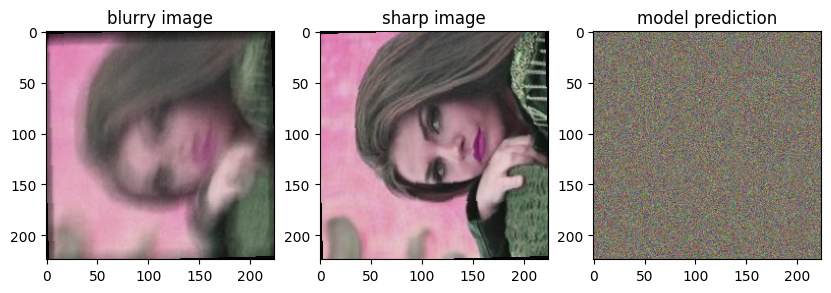

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00058433414..0.9404661].


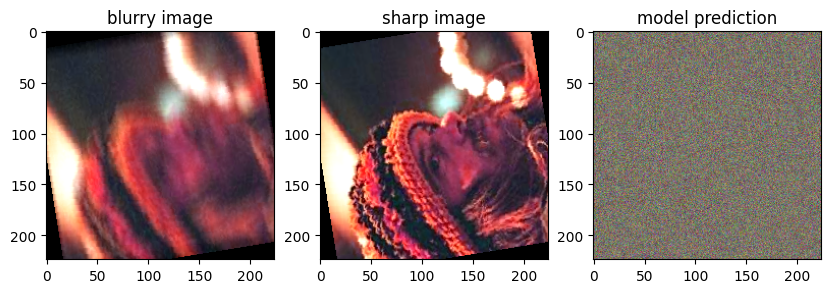

100%|██████████| 1/1 [00:00<00:00, 32.85batch/s]


tensor(2.0276, device='cuda:0')
tensor(-3.0699, device='cuda:0')
Epoch: 10, Train loss: -3.9578, Validation loss: -6.1399


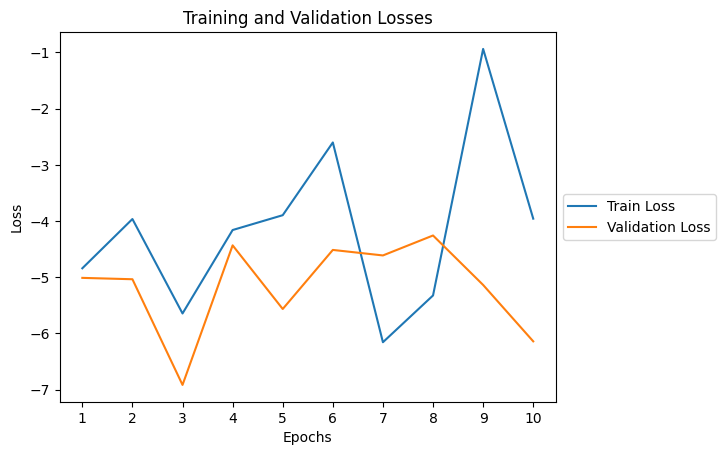

In [21]:
trainer.train(
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=num_epochs
)